In [2]:
import numpy as np
import matplotlib.pyplot as plt

def calc_TWI(tp,tt,tdelay,theta):
    TWI = 0
    NTP = int(np.floor((tp-tdelay)/tt))
    if NTP > 0:
        for j in np.arange(NTP):
            omtj = (1-theta)**j
            TWI += theta*omtj*((j+0.5)*tt+tdelay)

    pl = (tp-tdelay)/tt - NTP
    omtj = (1-theta)**NTP
    TWI += pl*omtj*(0.5*theta*(NTP*tt+tdelay+tp) + (1-theta)*tp)
    TWI += omtj*(1-pl)*tp

    return TWI

def calc_TWNI(tp,ti,tt,tdelay,theta):
    TWNI = 0
    NTI = int(np.floor((tp+ti-tdelay)/tt))
    if NTI > 0:
        for j in np.arange(NTI):
            omtj = (1-theta)**j
            TWNI += theta*omtj*((j+0.5)*tt+tdelay)
    pk = (tp+ti-tdelay)/tt - NTI
    omtj = (1-theta)**NTI
    TWNI += pk*omtj*(0.5*theta*(NTI*tt+tdelay+tp+ti) + (1-theta)*(tp+ti))
    TWNI += omtj*(1-pk)*(tp+ti)
    
    return TWNI

def calc_TW(tp,ti,tt,tdelay,theta,Pisol):
    return (Pisol*calc_TWI(tp,tt,tdelay,theta) + (1-Pisol)*calc_TWNI(tp,ti,tt,tdelay,theta))

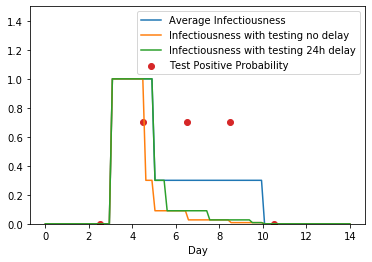

In [17]:
#visualisation
x = np.arange(101)*0.14
TT = [2.5,4.5,6.5,8.5,10.5]
pp = [0,0.7,0.7,0.7,0]
II = np.zeros(len(x))
II[(x > 3) * (x < 10)] = 1
II[(x>5)] = II[(x>5)]*0.3
II2 = II.copy()
II3 = II.copy()
for i in np.arange(len(TT)):
    II2[x > TT[i]] = II2[x > TT[i]]*(1-pp[i])
    II3[x > TT[i]+1] = II3[x > TT[i]+1]*(1-pp[i])
plt.plot(x,II,label='Average Infectiousness')
plt.scatter(TT,pp,c='C3',label='Test Positive Probability')
plt.plot(x,II2,label='Infectiousness with testing no delay')
plt.plot(x,II3,label='Infectiousness with testing 24h delay')
plt.legend()
plt.ylim((0,1.5))
plt.xlabel('Day')
plt.savefig('Infectiousness_vis.png')

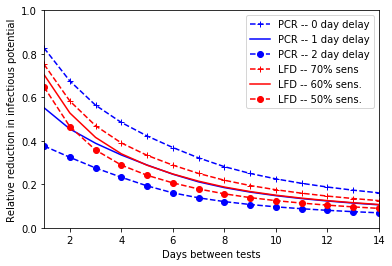

In [20]:
pa = 0.3
tp = 2.0
ti = 5.0
tisol = 10.0
theta = [0.9,0.9,0.9,0.7,0.6,0.5]
tdelay = [0.0,1.0,2.0,0.0,0.0,0.0]
TW0 = tp + pa*ti
Tvals = np.arange(1,15)
TWvals = np.zeros((len(Tvals),6))
for j in np.arange(6):
    i = 0
    for tt in Tvals:
        TWvals[i,j] = calc_TW(tp,ti,tt,tdelay[j],theta[j],1-pa)
        i += 1
plt.plot(Tvals, (TW0-TWvals[:,0])/TW0, '--+',c=[0,0,1],label='PCR -- 0 day delay')
plt.plot(Tvals, (TW0-TWvals[:,1])/TW0, '-',c=[0,0,1],label='PCR -- 1 day delay')
plt.plot(Tvals, (TW0-TWvals[:,2])/TW0, '--o',c=[0,0,1],label='PCR -- 2 day delay')
plt.plot(Tvals, (TW0-TWvals[:,3])/TW0, '--+',c=[1,0,0],label='LFD -- 70% sens')
plt.plot(Tvals, (TW0-TWvals[:,4])/TW0, '-',c=[1,0,0],label='LFD -- 60% sens.')
plt.plot(Tvals, (TW0-TWvals[:,5])/TW0, '--o',c=[1,0,0],label='LFD -- 50% sens.')

plt.xlabel('Days between tests')
plt.ylabel('Relative reduction in infectious potential')
plt.xlim((1,14))
plt.ylim((0,1))
plt.legend()
plt.savefig('Testing_simple_asymp0.3.png')

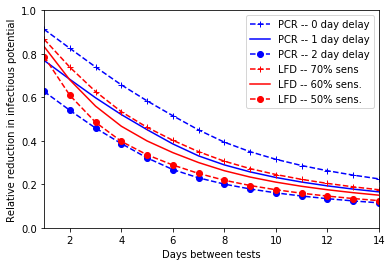

In [21]:
pa = 1.00
tp = 2.0
ti = 5.0
tisol = 10.0
theta = [0.9,0.9,0.9,0.7,0.6,0.5]
tdelay = [0.0,1.0,2.0,0.0,0.0,0.0]
TW0 = tp + pa*ti
Tvals = np.arange(1,15)
TWvals = np.zeros((len(Tvals),6))
for j in np.arange(6):
    i = 0
    for tt in Tvals:
        TWvals[i,j] = calc_TW(tp,ti,tt,tdelay[j],theta[j],1-pa)
        i += 1
plt.plot(Tvals, (TW0-TWvals[:,0])/TW0, '--+',c=[0,0,1],label='PCR -- 0 day delay')
plt.plot(Tvals, (TW0-TWvals[:,1])/TW0, '-',c=[0,0,1],label='PCR -- 1 day delay')
plt.plot(Tvals, (TW0-TWvals[:,2])/TW0, '--o',c=[0,0,1],label='PCR -- 2 day delay')
plt.plot(Tvals, (TW0-TWvals[:,3])/TW0, '--+',c=[1,0,0],label='LFD -- 70% sens')
plt.plot(Tvals, (TW0-TWvals[:,4])/TW0, '-',c=[1,0,0],label='LFD -- 60% sens.')
plt.plot(Tvals, (TW0-TWvals[:,5])/TW0, '--o',c=[1,0,0],label='LFD -- 50% sens.')

plt.xlabel('Days between tests')
plt.ylabel('Relative reduction in infectious potential')
plt.xlim((1,14))
plt.ylim((0,1))
plt.legend()
plt.savefig('Testing_simple_asymp0.75.png')

In [40]:
TW0 = tp + 0.3*ti
print(1-calc_TW(tp,ti,3.5,0,0.9,0.7)/TW0)
print(1-calc_TW(tp,ti,3.5,1,0.9,0.7)/TW0)
print(1-calc_TW(tp,ti,3.5,2,0.9,0.7)/TW0)

0.5213571428571429
0.3604591836734693
0.2531938775510204


In [45]:
TW0 = tp
print(1-calc_TW(tp,ti,3.5,tp,0.9,1.0)/TW0)

0.0


In [46]:
TW0 = tp+ti
print(1-calc_TW(tp,ti,3.5,tp+ti,0.9,0.0)/TW0)

0.0
